In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
torch.__version__

'1.3.1'

In [2]:
batch_size=64

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
     
    # Convert a PIL Image or numpy.ndarray to tensor.
    # Nomarlizing PIL [0,1] to tensor[-1,1]


#trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                        download=True, transform=transform)
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=bat_size,
#                                          shuffle=True, num_workers=2)

#testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                       download=True, transform=transform)
#testloader = torch.utils.data.DataLoader(testset, batch_size=bat_size,
#                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

batch_size=64
validation_ratio = 0.1
random_seed = 10

transform_train = transforms.Compose([
        #transforms.Resize(32),
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

transform_validation = transforms.Compose([
        #transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])


transform_test = transforms.Compose([
        #transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

    # Convert a PIL Image or numpy.ndarray to tensor.
    # Nomarlizing PIL [0,1] to tensor[-1,1]


trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

validset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_validation)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(validation_ratio * num_train))


np.random.seed(random_seed)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, sampler=train_sampler, num_workers=0
)

val_loader = torch.utils.data.DataLoader(
    validset, batch_size=batch_size, sampler=valid_sampler, num_workers=0
)

testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=0
)



classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [4]:
print('train:',len(trainset), '     val:',len(testset), '    test',len(validset))

train: 50000      val: 10000     test 50000


In [5]:
val_loader.dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))
           )

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, stride=1, padding=1)
        self.batchnorm1=nn.BatchNorm2d(32)
        nn.init.kaiming_normal_(self.conv1.weight)

        self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchnorm2=nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchnorm3=nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2,stride=2)
        self.dropout = nn.Dropout(0.5)

        self.fc1 = nn.Linear(128*3*3, 500)
        self.fc2 = nn.Linear(500, 10)
        
        # case(4)
       # nn.init.kaiming_normal_(self.conv1.weight)
       # nn.init.kaiming_normal_(self.conv2.weight)
       # nn.init.kaiming_normal_(self.conv3.weight)
       # nn.init.kaiming_normal_(self.fc1.weight)
       # nn.init.kaiming_normal_(self.fc2.weight)

    def forward(self, x):
        
        # case(1)
      #  x = self.pool(F.relu((self.conv1(x))))
      #  x = self.pool(F.relu((self.conv2(x))))
      #  x = self.pool(F.relu((self.conv3(x))))

        # case(2)
        x = self.pool(F.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(F.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(F.relu(self.batchnorm3(self.conv3(x))))

 
        x = x.view(-1, 128*3*3)
         # case(3)
        x = self.dropout(x)  
        x = self.fc1(x)
        x = self.fc2(x)

        return x


net = Net()
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (batchnorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchnorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1152, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)>

In [10]:
from torchsummary import summary
summary(net.cuda(), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]           2,432
       BatchNorm2d-2           [-1, 32, 30, 30]              64
         MaxPool2d-3           [-1, 32, 15, 15]               0
            Conv2d-4           [-1, 64, 15, 15]          18,496
       BatchNorm2d-5           [-1, 64, 15, 15]             128
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 7, 7]          73,856
       BatchNorm2d-8            [-1, 128, 7, 7]             256
         MaxPool2d-9            [-1, 128, 3, 3]               0
          Dropout-10                 [-1, 1152]               0
           Linear-11                  [-1, 500]         576,500
           Linear-12                   [-1, 10]           5,010
Total params: 676,742
Trainable params: 676,742
Non-trainable params: 0
-------------------------------

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [13]:
import time

epoch=200
tr=[]
va=[]
te=[]
train_accuracy=[]
test_accuracy=[]

for epoch in range(epoch):   # for Every epoch
    tic=time.time()
    print('*** epoch: %d ***' % epoch)
    train_loss = 0.0
    test_loss=0.0
    val_loss=0.0
    total=0
    correct=0
    
    net.train()
    for i, data in enumerate(trainloader, 0):
    # 1. Train the Network        
        
        # loading a batch data
        inputs, labels = data[0].cuda(), data[1].cuda() 
        
        # Set gradient to zero
        optimizer.zero_grad()

        # Fowarding
        outputs = net(inputs)

        # Loss
        loss = criterion(outputs, labels)
        
        # Backwarding
        loss.backward()

        # Optimizing
        optimizer.step()

        #train_loss += loss.item()
        
#        if i%2000==0:
#            print('iter: %d' % i)

    # 2. Evaltuate the Network
    net.eval()
    with torch.no_grad():
        total=0
        correct=0

        for j, data in enumerate(trainloader, 0):
            inputs, labels = data[0].cuda(), data[1].cuda()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_accuracy.append(correct/total)
        
        for j, data in enumerate(val_loader, 0):
            inputs, labels = data[0].cuda(), data[1].cuda()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

        total=0
        correct=0
        for j, data in enumerate(testloader, 0):
            inputs, labels = data[0].cuda(), data[1].cuda()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        test_accuracy.append(correct/total)
        te.append(test_loss/10000)
        toc=time.time()

       
 
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    
    print('[epoch: %d ] train loss: %.3f,     val loss: %.3f  training time: %d'  %(epoch, train_loss/45000, val_loss/5000, toc-tic))
    tr.append(train_loss/45000)
    va.append(val_loss/5000)
print('Finished Training')

n loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 63 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 63 ] train loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 64 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 64 ] train loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 65 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 65 ] train loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 66 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 66 ] train loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 67 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 67 ] train loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 68 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 68 ] train loss: 0.007,     val loss: 0.008  training time: 25
*** epoch: 69 ***
Accuracy of the network on the 10000 test images: 82 %
[epoch: 6

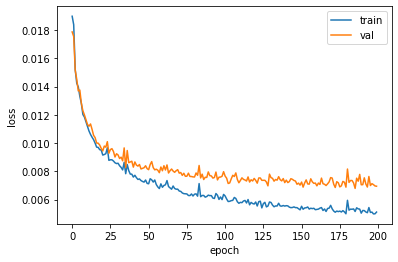

In [16]:
import matplotlib.pyplot as plt

plt.plot(tr)
plt.plot(va)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])

In [17]:
# accuracy of each classes in testdata
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].cuda(),data[1].cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 87 %
Accuracy of   car : 90 %
Accuracy of  bird : 83 %
Accuracy of   cat : 69 %
Accuracy of  deer : 81 %
Accuracy of   dog : 77 %
Accuracy of  frog : 92 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 88 %


In [18]:
# accuracy of whole testdata
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].cuda(),data[1].cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


Text(0.5, 1.0, 'loss vs epoch')

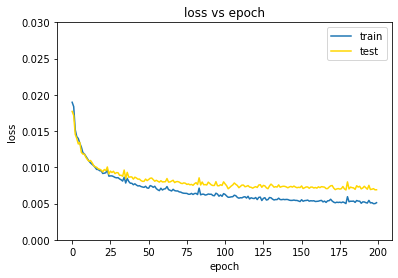

In [41]:
plt.plot(tr)
plt.plot(te,'gold')
plt.ylim(0,0.03)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.title('loss vs epoch')

Text(0.5, 1.0, 'accuracy vs epoch')

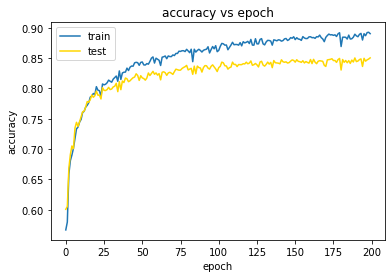

In [42]:
plt.plot(train_accuracy)
plt.plot(test_accuracy,'gold')
#plt.ylim(0,0.03)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.title('accuracy vs epoch')

In [23]:
train_accuracy[199]

0.8902666666666667

In [22]:
test_accuracy[199]

0.8503